
# PPE Identification Model using Computer Vision with YOLO and OpenCV



## Introduction

This notebook is responsible for training and evaluating the model for the SIMPATIA project, which uses computer vision techniques to monitor, in real time, the use of PPE (Personal Protective Equipment) by employees, aiming to identify those who are not complying with safety regulations. The trained artificial intelligence model can automatically detect the absence or improper use of PPE, such as helmets, gloves, safety glasses, among others, using images captured by cameras.

The solution presented in this project is based on YOLOv8, a state-of-the-art object detection architecture, adapted to solve the problem of PPE detection.

### 1. Environment Setup

Information about the GPU environment and setting the working directory:

In [1]:
!nvidia-smi

Mon Nov 11 19:53:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


### 2. Installing Dependencies

Installation of the library that contains YOLOv8 (ultralytics) and the tool that downloads labeled datasets and integrates them into the training pipeline (roboflow).

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 15.2 MB/s eta 0:00:00


In [5]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


### 3. Importing Libraries
The libraries Yolo, IPython.display, roboflow, and cv2 are used for dataset integration, model framework import, image display, and image manipulation.

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image
from roboflow import Roboflow
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### 4. Roboflow Configuration and Dataset Download

Connecting to the Roboflow API to access the labeled dataset.

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="lNYbU1SzhTm0CpXxEaav")
project = rf.workspace("epi-detection").project("epis-zwtke")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EPIs-1 in yolov8:: 100%|██████████| 3410/3410 [00:00<00:00, 5431.79it/s]


### 5. YOLOv8 Model Configuration and Training

During the training of the YOLOv8 model for PPE detection, the command includes the following parameters:

- `task=detect`: Defines the task as object detection.
- `mode=train`: Indicates that the model will be trained.
- `model=yolov8s.pt`: Uses the pre-trained YOLOv8 Small model as a starting point.
- `data=.../data.yaml`: Specifies the path to the YAML file containing class definitions and dataset paths.
- `epochs=10`: Trains the model for 10 epochs.
- `imgsz=800`: Sets the image size for training.
- `plots=True`: Generates plots to track training progress.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/EPIs-1/data.yaml epochs=10 imgsz=800 plots=True


/content
100% 21.5M/21.5M [00:00<00:00, 91.2MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Person-detection-16/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

### 6. Model Evaluation
Listing the files generated during training and displaying the confusion matrix and performance charts of the model.

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1730751875.79fcc5277c2a.2224.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


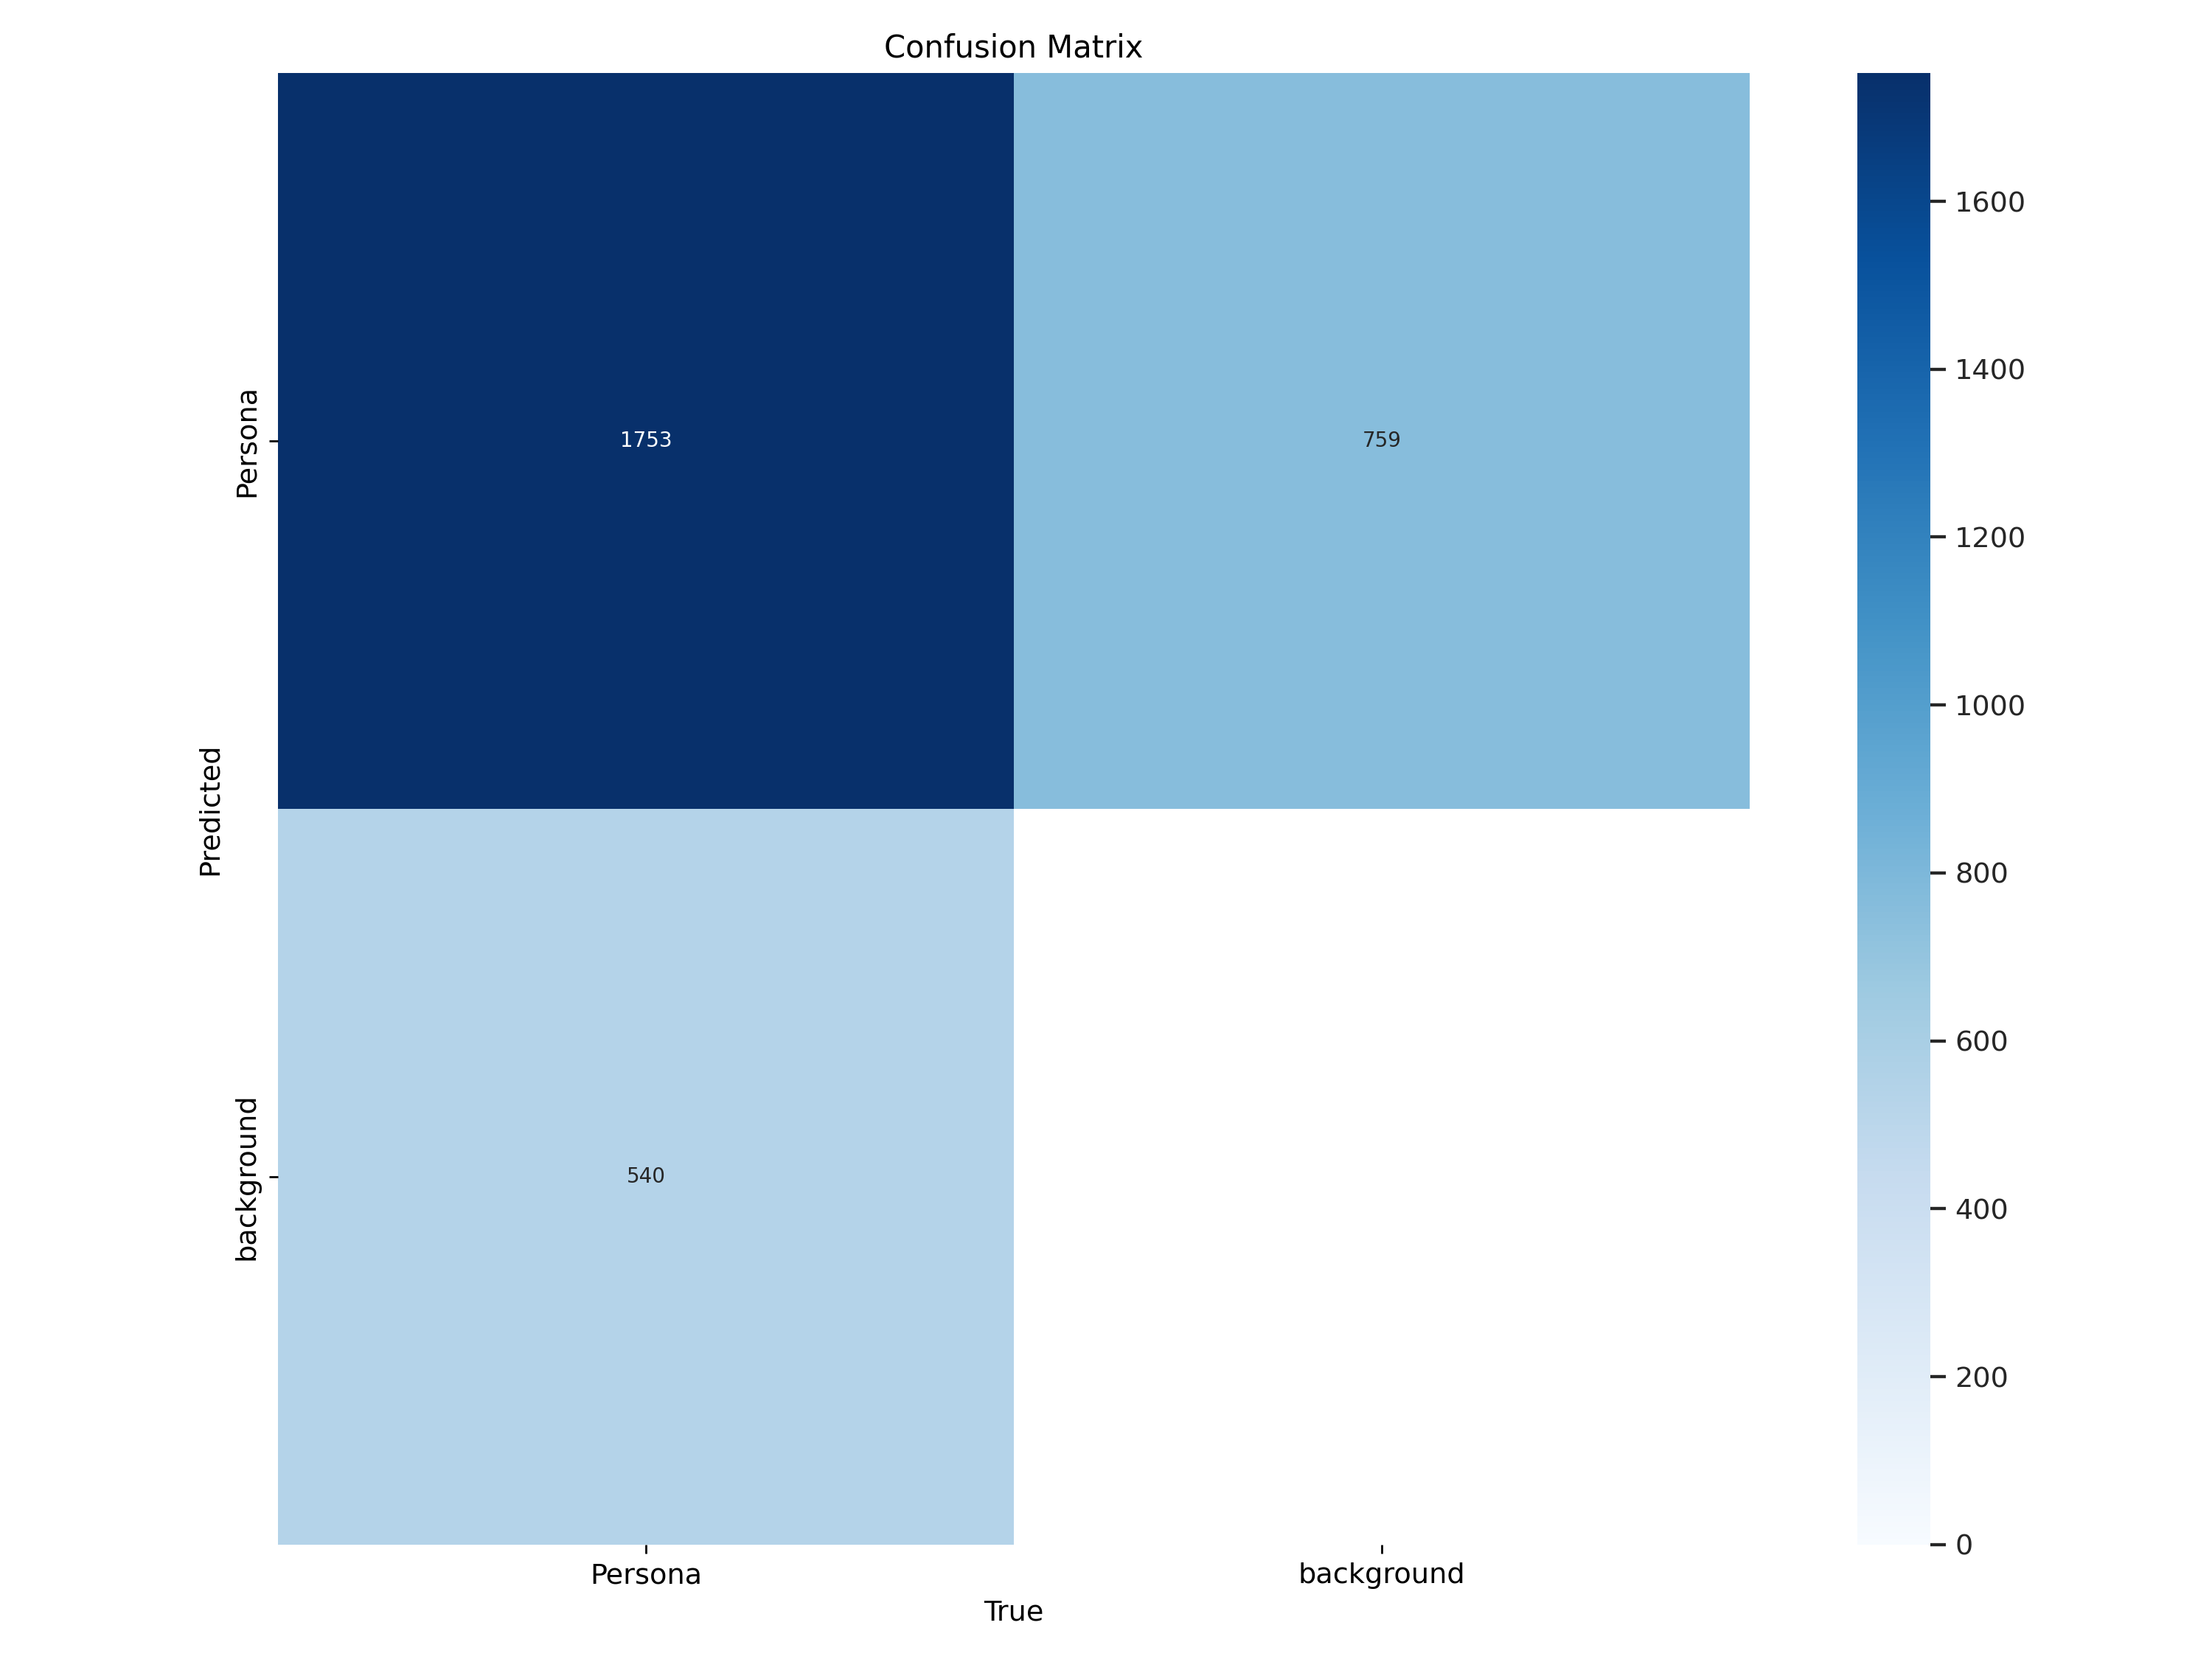

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


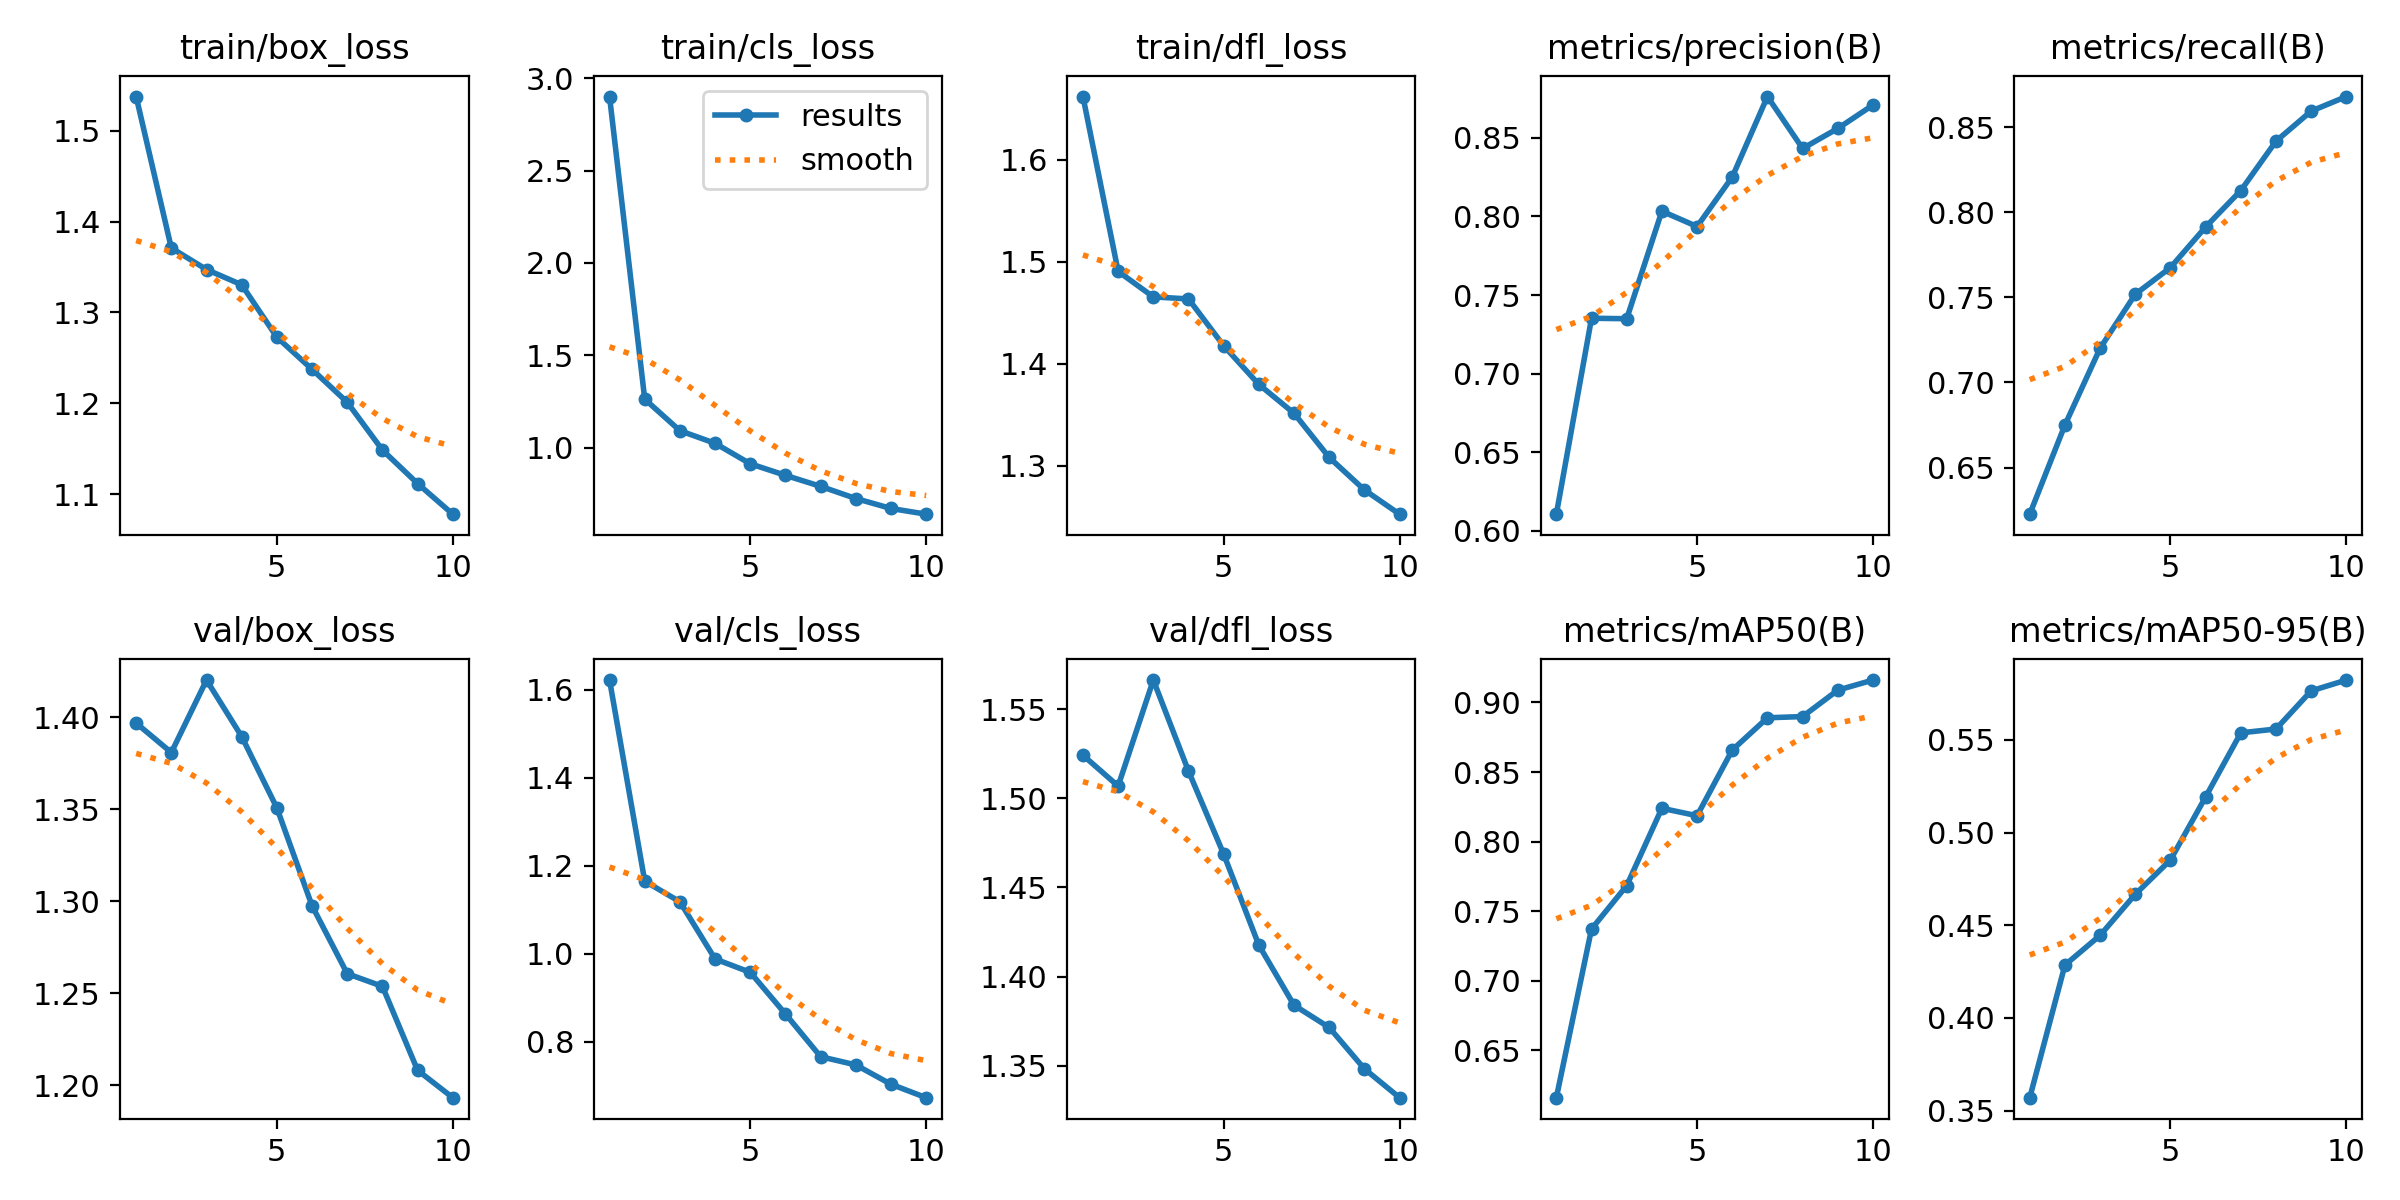

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


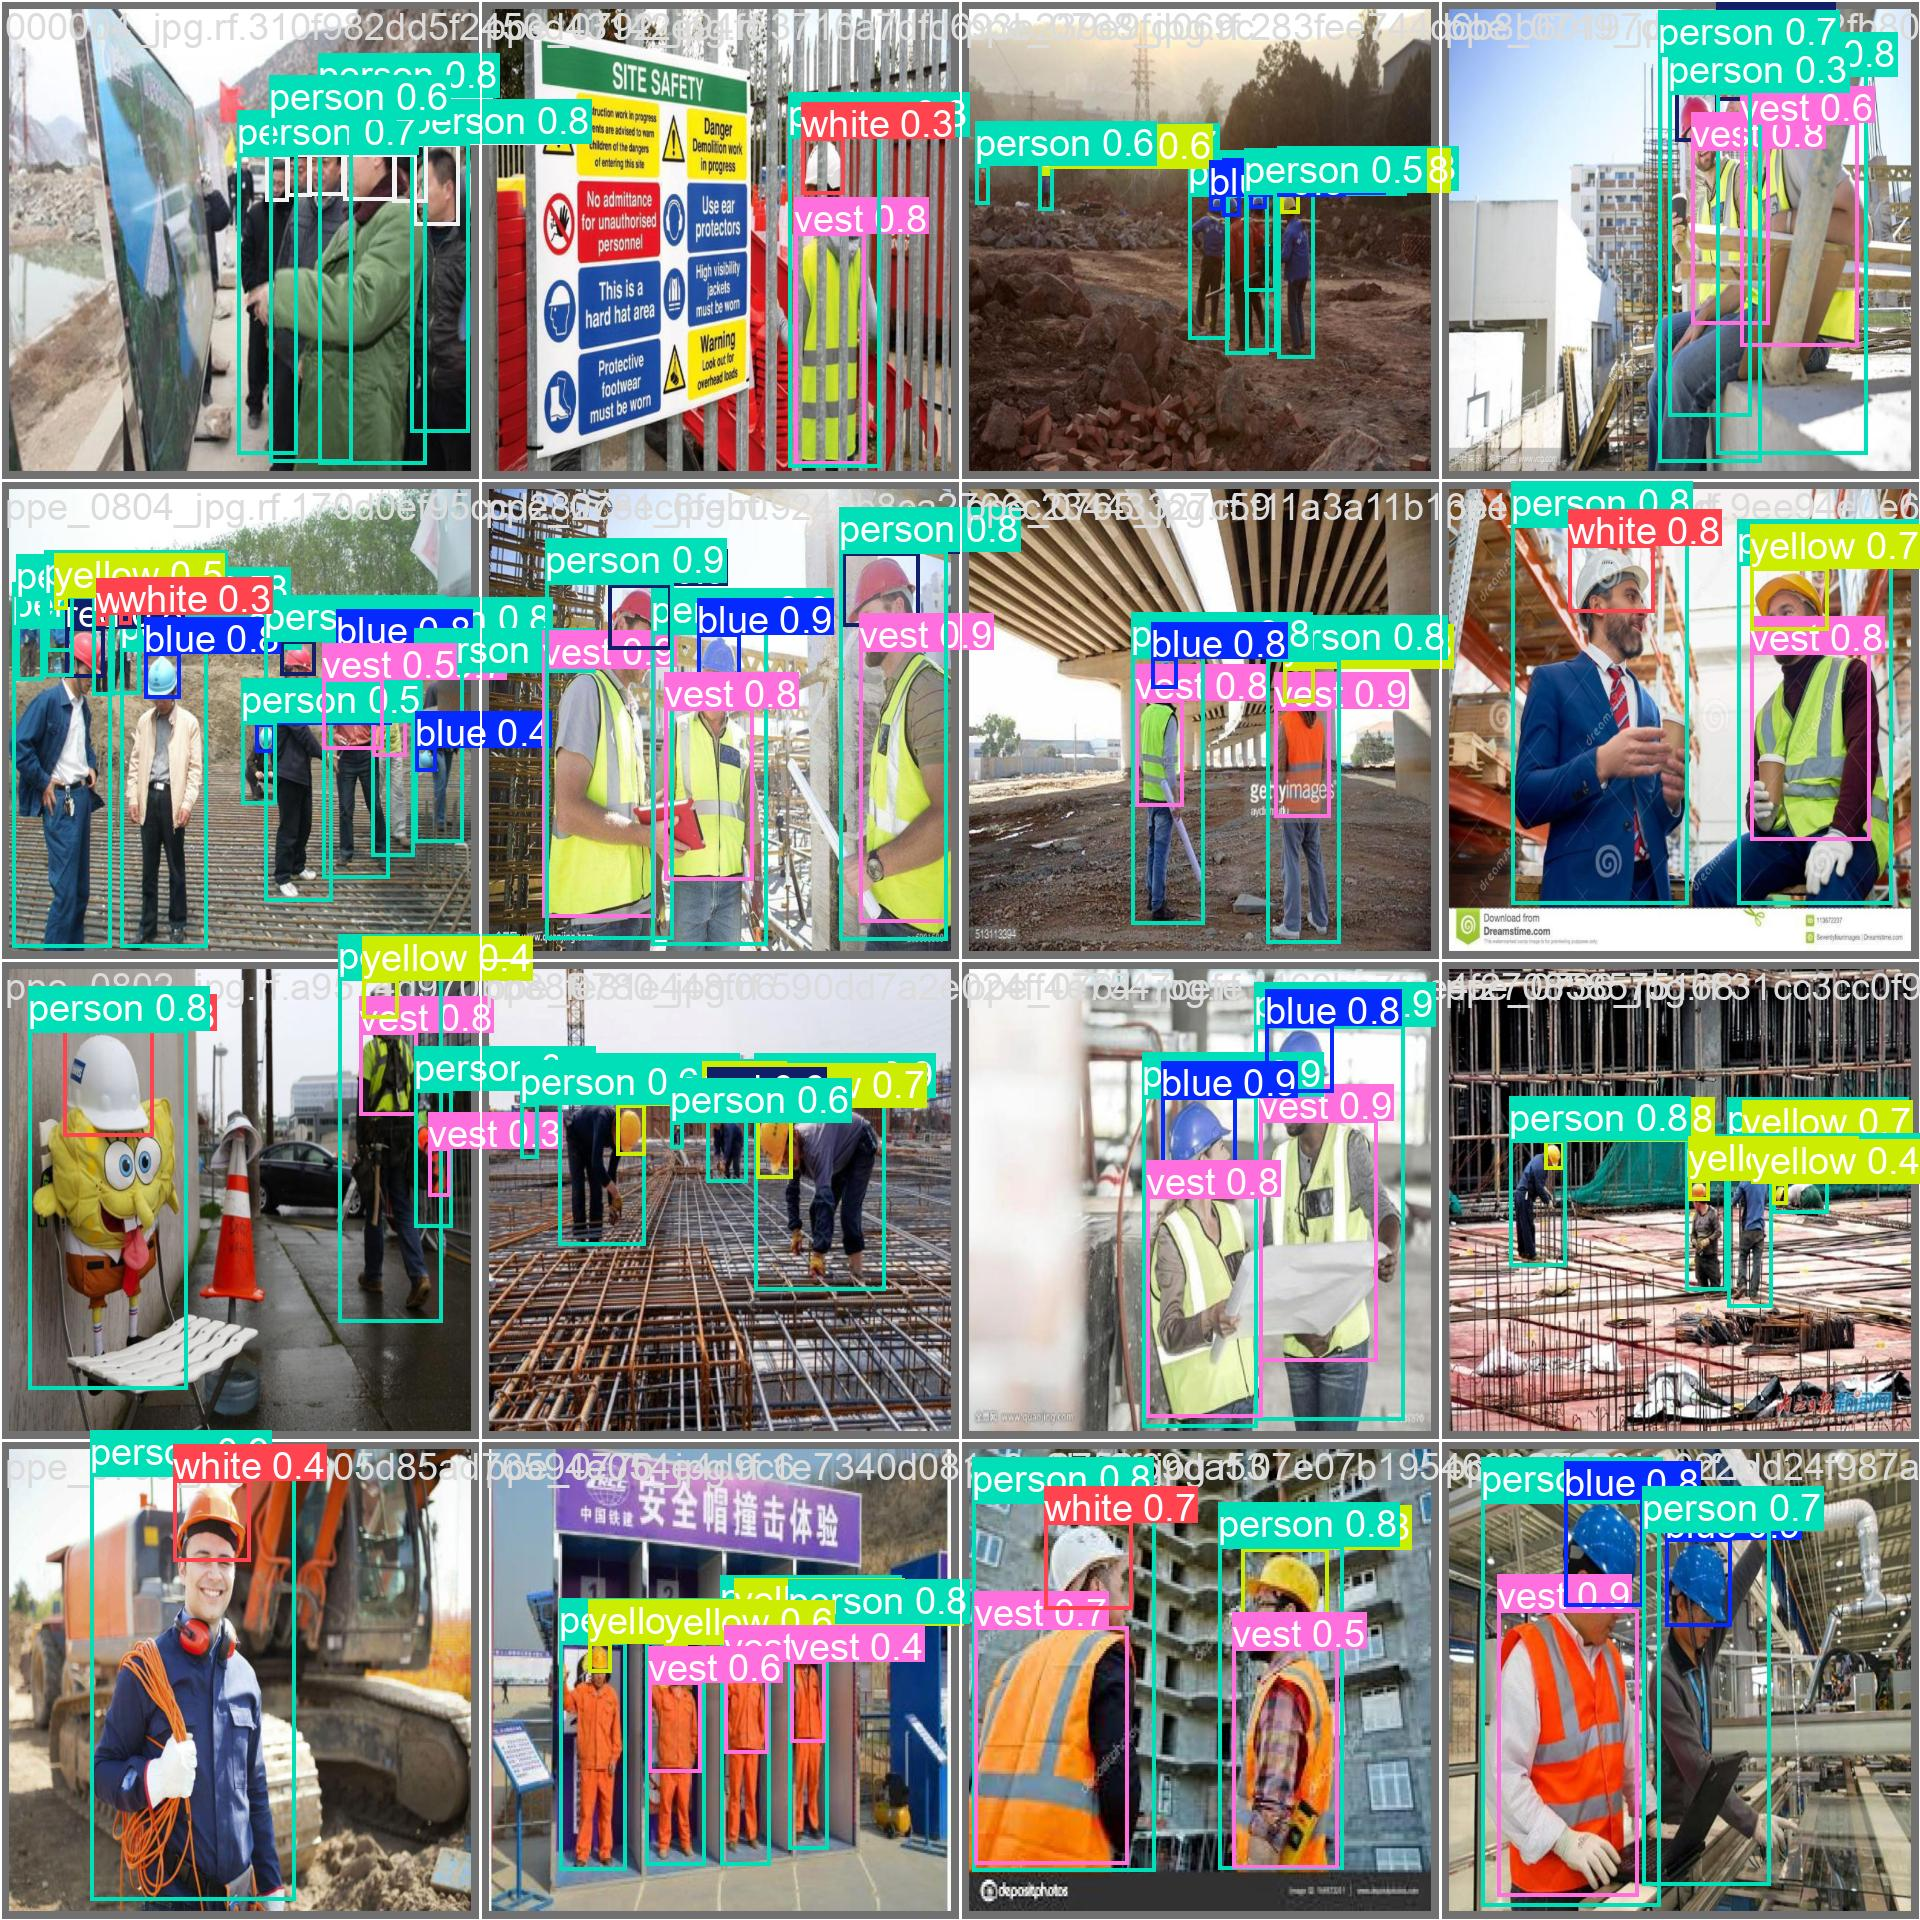

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### 7. Model Validation
When evaluating the trained model on the validation set, the command includes the following parameters:

- `mode=val`: Sets the validation mode.
- `model=.../best.pt`: Uses the model with the best training weights.
- `data=.../data.yaml`: Points to the validation dataset.



In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


/content
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/EPIs-1/valid/labels.cache... 340 images, 0 backgrounds, 0 corrupt: 100% 340/340 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 22/22 [00:12<00:00,  1.71it/s]
                   all        340       2304      0.871      0.868      0.916      0.583
                  blue         71        123      0.925      0.911      0.949      0.631
                 glass         75        106      0.882      0.703      0.843      0.485
                  head         32        113      0.888      0.841      0.906      0.537
                person        338        962      0.882      0.918      0.946      0.641
                   red         59        115      0.826      0.878      0.916      0.551
                  vest        177        

### 8. Prediction on New Images
In this section, the model is used to make predictions on test images. The command includes the following parameters:

- `mode=predict`: Activates prediction mode.
- `model=.../best.pt`: Uses the trained model.
- `conf=0.25`: Sets the minimum confidence threshold for detections.
- `source=.../test/images`: Directory containing the test images.
- `save=True`: Saves the images with detected objects drawn.


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs

image 1/170 /content/EPIs-1/test/images/000196_jpg.rf.472fb64ba594429c1bfbd6f15212e568.jpg: 800x800 10 heads, 8 persons, 22.8ms
image 2/170 /content/EPIs-1/test/images/000528_jpg.rf.cbe3ca17e14024ab90b7aca803219da5.jpg: 800x800 11 heads, 9 persons, 22.9ms
image 3/170 /content/EPIs-1/test/images/001382_jpg.rf.9305c594987efd7e0f4c216180e1eafe.jpg: 800x800 6 heads, 6 persons, 22.8ms
image 4/170 /content/EPIs-1/test/images/001386_jpg.rf.aac02c73be92346cbd74e820a0909724.jpg: 800x800 4 heads, 4 persons, 22.8ms
image 5/170 /content/EPIs-1/test/images/001453_jpg.rf.e171d4fd6923f31ca979df290248d754.jpg: 800x800 7 heads, 5 persons, 22.8ms
image 6/170 /content/EPIs-1/test/images/002622_jpg.rf.3936c0f864982a5bc1b6c276b6abc65c.jpg: 800x800 6 heads, 7 persons, 23.3ms
image 7/170 /content/EPIs-1/test/images/002821_jpg.rf.fd

### 9. Visualization of Predictions:
Display of predicted images:

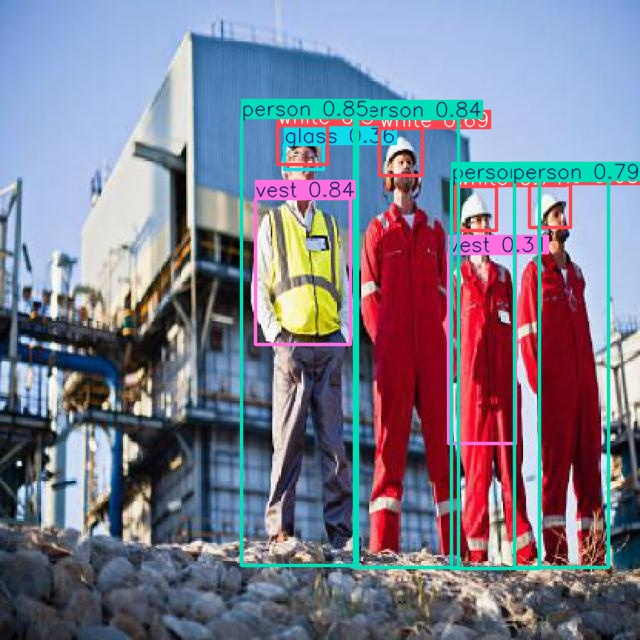

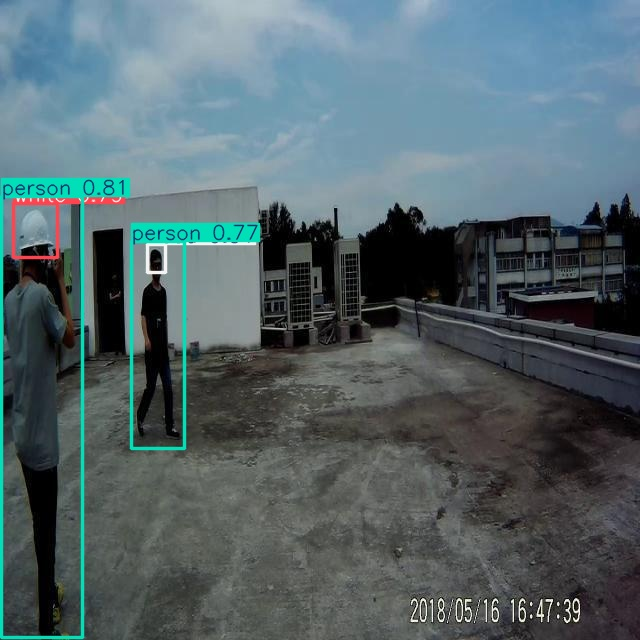

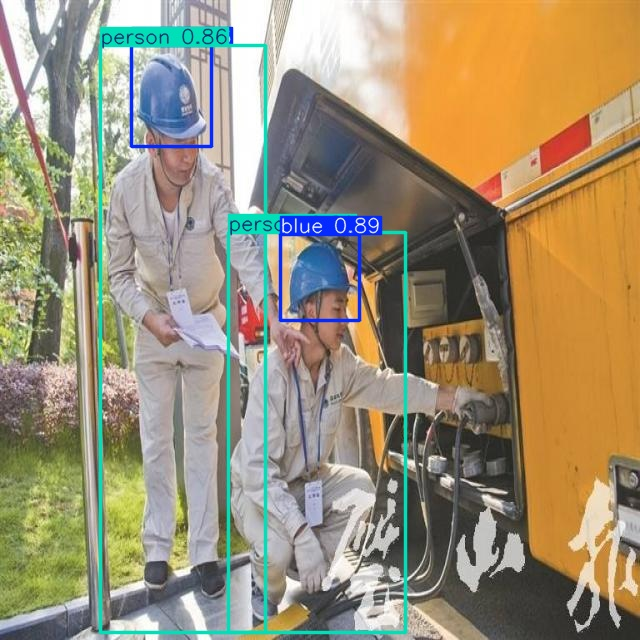

In [ ]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Conclusion

This notebook demonstrates how a computer vision model can be trained to identify improper use of PPEs in the workplace. The solution is scalable and can be integrated with real-time monitoring systems, contributing to employee safety and compliance with regulatory standards. The use of YOLOv8 ensures high accuracy and efficiency, enabling fast and reliable detections.